# **Task 4 : Sentiment Analysis**

---


### ***Dataset Description :***
<br>
<b>Source :</b> The data set used in this task is taken from "Kaggle" : https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?select=twitter_training.csv
<br><br>
<b>Name of Data Set Used :</b> The dataset named 'twitter_training' was used in this task

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.pipeline import make_pipeline
import re
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# The dataset has no headers, so assigning column names
column_names = ['id', 'entity', 'sentiment', 'text']

# Load the dataset without headers
df=pd.read_csv('twitter_training[1].csv',header=None, names=column_names)
df

,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
def preprocess_text(text):
    try:
        # Convert to string if the input is not a string or bytes
        text = str(text)

        # Remove special characters, URLs, and user mentions
        text = re.sub(r"http\S+|www\S+|https\S+|@\S+|#\S+|[^A-Za-z\s]", "", text, flags=re.UNICODE)

        # Tokenization
        tokens = word_tokenize(text)

        # Remove stopwords and apply stemming
        stop_words = set(stopwords.words('english'))
        ps = PorterStemmer()
        tokens = [ps.stem(word) for word in tokens if word.lower() not in stop_words]

        return ' '.join(tokens)
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return ''

# Apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)


In [5]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['sentiment'], test_size=0.2, random_state=42)

In [6]:
# Build a Naive Bayes classifier using TF-IDF vectorization
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [7]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [8]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.68
Confusion Matrix:
[[ 850  874  221  647]
 [  16 4018  184  301]
 [  26  956 1994  620]
 [  22  673  212 3323]]
Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.93      0.33      0.48      2592
    Negative       0.62      0.89      0.73      4519
     Neutral       0.76      0.55      0.64      3596
    Positive       0.68      0.79      0.73      4230

    accuracy                           0.68     14937
   macro avg       0.75      0.64      0.65     14937
weighted avg       0.72      0.68      0.67     14937



<h6><b>Inference :</b> <i>

>*  <u>Accuracy</u> : The accuracy of 0.68 indicates that the model correctly predicted the sentiment for approximately 68% of the samples in the dataset.
*   <u>Confusion Matrix</u> : The rows of the confusion matrix represent the actual classes (Irrelevant, Negative, Neutral, Positive) where as the columns represent the Predicted classes. Also each element (i, j) in the matrix represents the number of instances where the true class was i and the model predicted class j. For example, the value at the (3, 4) position (third row, fourth column) is 620, indicating that 620 samples with true class "Neutral" were predicted as "Positive" by the model.

</i></h6>

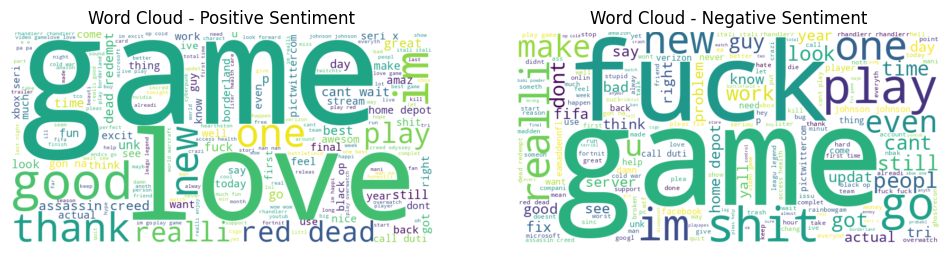

In [10]:
# Separate positive and negative sentiments
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['processed_text'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['processed_text'])

# Create WordCloud for positive sentiment
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Create WordCloud for negative sentiment
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the WordClouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud - Positive Sentiment')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud - Negative Sentiment')
plt.axis('off')

plt.show()

In [11]:
# Separate positive and negative sentiments
positive_text = ' '.join(df[df['sentiment'] == 'Positive']['processed_text'])
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['processed_text'])

# Tokenize the texts
positive_tokens = positive_text.split()
negative_tokens = negative_text.split()

# Count the frequency of each word
positive_word_freq = Counter(positive_tokens)
negative_word_freq = Counter(negative_tokens)

# Display the most common words for each sentiment
print("Top 10 Positive Words:")
print(positive_word_freq.most_common(10))

print("\nTop 10 Negative Words:")
print(negative_word_freq.most_common(10))


Top 10 Positive Words:
[('game', 3270), ('play', 2548), ('love', 2104), ('im', 1770), ('good', 1626), ('like', 1463), ('get', 1304), ('thank', 1304), ('realli', 1290), ('new', 1215)]

Top 10 Negative Words:
[('game', 4594), ('fuck', 2463), ('get', 2373), ('play', 2084), ('like', 1675), ('shit', 1543), ('fix', 1452), ('im', 1425), ('go', 1272), ('cant', 1229)]
